In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
kidney_df=pd.read_csv('C:\\Users\\capiot\\PycharmProjects\\CKD\\kidney_disease.csv',encoding='iso-8859-1')

In [3]:
kidney_df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [4]:
kidney_df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [5]:
kidney_median_df = kidney_df.fillna(kidney_df.median())

It shows that all numeric continuous features got replaced by their median

In [6]:
kidney_median_df.isnull().sum()[kidney_median_df.isnull().sum() == 0].index

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'classification'],
      dtype='object')

In [7]:
high_cat_val_missing = ['rbc','pc','pcv','wc','rc']

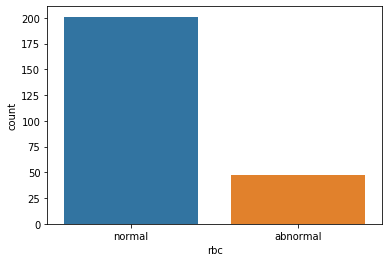

In [8]:
sns.countplot(kidney_df['rbc'])

Majority of the rbc value is normal.<br>
Only a few of them are abnormal

Before observing how the values are distributed according to classification variable.<br>
Let's fix a few values in classification series before we observe the count plot.

In [9]:
kidney_df['classification'].replace('ckd\t','ckd',inplace = True)

In [10]:
kidney_df['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

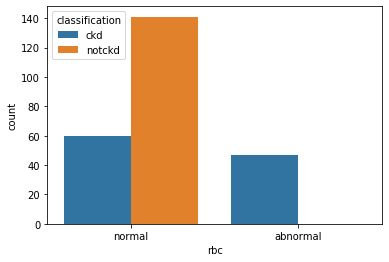

In [11]:
sns.countplot(x = 'rbc',hue='classification',data=kidney_df)

Replacing NAN values based on grouping with target variable

In [12]:
kidney_df.loc[(kidney_df['classification'] == 'ckd') & kidney_df['rbc'].isnull(),'rbc'] = 'abnormal'
kidney_df.loc[(kidney_df['classification'] == 'notckd') & kidney_df['rbc'].isnull(),'rbc'] = 'normal'

In [13]:
kidney_df['rbc'].value_counts()

normal      210
abnormal    190
Name: rbc, dtype: int64

In [14]:
## Replacing abnormal with 0's
## Replacing normal with 1's
kidney_df['rbc'] = kidney_df['rbc'].replace('abnormal',1)
kidney_df['rbc'] = kidney_df['rbc'].replace('normal',0)
kidney_df['rbc'].value_counts()

0    210
1    190
Name: rbc, dtype: int64

## Let's impute attribute PC

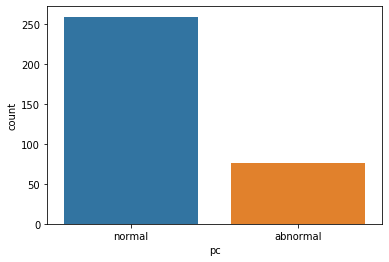

In [15]:
sns.countplot(kidney_df['pc'])

percentage of normal pc is more than abnormal

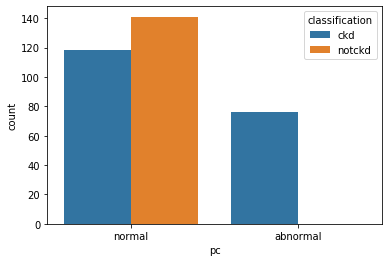

In [16]:
sns.countplot(x = 'pc',hue='classification',data = kidney_df)

Distribution along 'normal' category for target class is almost same.<br>
Let's see how many null values are to be filled in each category.

In [17]:
print("Distribution of pc NAN values wrt to ckd : ",len(kidney_df.loc[(kidney_df['classification'] == 'ckd') & (kidney_df['pc'].isnull())]['pc']))
print("Distribution of pc NAN values wrt to notckd : ",len(kidney_df.loc[(kidney_df['classification'] == 'notckd') & (kidney_df['pc'].isnull())]['pc']))

Distribution of pc NAN values wrt to ckd :  56
Distribution of pc NAN values wrt to notckd :  9


In [18]:
kidney_df['pc'].value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

In [19]:
# Replacing abnormal category by 1 
# Replacing normal category by 0
kidney_df['pc'].replace('abnormal',1,inplace = True)
kidney_df['pc'].replace('normal',0,inplace = True)
kidney_df['pc'].value_counts()

0.0    259
1.0     76
Name: pc, dtype: int64

In [20]:
abs(kidney_df.corr()['pc'])

id      0.411358
age     0.150867
bp      0.189310
sg      0.374407
al      0.558535
su      0.202815
rbc     0.202291
pc      1.000000
bgr     0.329612
bu      0.435700
sc      0.356734
sod     0.358833
pot     0.185211
hemo    0.541903
Name: pc, dtype: float64

Here albumin and hemoglobin show some decent correlation with pc.<br>
Let's use that to decide upon the values to fill for pc.

C:\Users\capiot\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\capiot\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


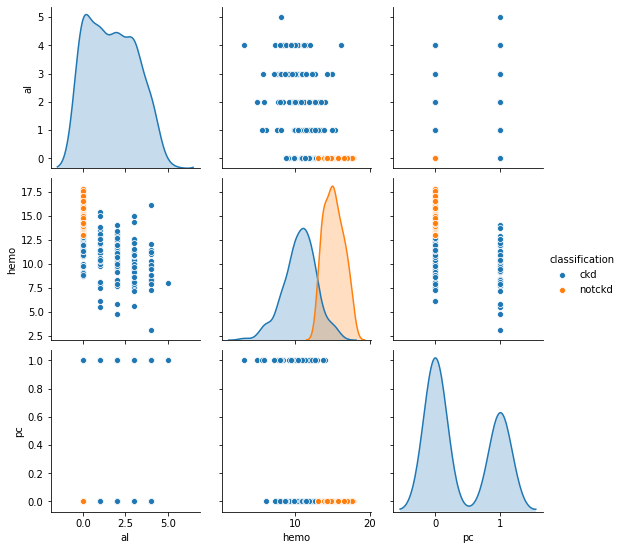

In [21]:
sns.pairplot(kidney_df[['al','hemo','pc','classification']],hue = 'classification')

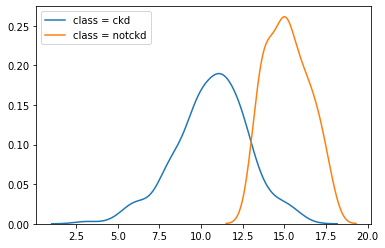

In [22]:
sns.kdeplot(kidney_df[(kidney_df['classification'] == 'ckd')]['hemo'],label='class = ckd')
sns.kdeplot(kidney_df[(kidney_df['classification'] == 'notckd')]['hemo'],label = 'class = notckd')

In [23]:
q_hemo_ckd = np.percentile(kidney_df[(kidney_df['classification'] == 'ckd') & ~(kidney_df['hemo'].isnull())]['hemo'],q =[0,100])
q_hemo_notckd = np.percentile(kidney_df[(kidney_df['classification'] == 'notckd') & ~(kidney_df['hemo'].isnull())]['hemo'],q =[0,100])

In [24]:
print("Range of values for hemo when class = notckd : ",q_hemo_notckd)

Range of values for hemo when class = notckd :  [13.  17.8]


In [25]:
q_al_ckd = np.percentile(kidney_df[(kidney_df['classification'] == 'ckd') & ~(kidney_df['al'].isnull())]['al'],q =[0,100])
q_al_notckd = np.percentile(kidney_df[(kidney_df['classification'] == 'notckd') & ~(kidney_df['al'].isnull())]['al'],q =[0,100])

In [26]:
print("Range of values for Albumin when class = notckd : ",q_al_notckd)

Range of values for Albumin when class = notckd :  [0. 0.]


So from above thing we can infer certain boundaries using which we can set the category of pc

In [27]:
# Replacing np.nan's according to notckd category 
print("Total values satisfying the condition : ",len(kidney_df.loc[(kidney_df['classification'] == 'notckd') & (kidney_df['al']==0.0) & (kidney_df['hemo'] >= 13) & (kidney_df['hemo'] <= 17.8)]['pc']))
print("Null values from the above count : ",len(kidney_df.loc[(kidney_df['classification'] == 'notckd') & (kidney_df['pc'].isnull())]['pc']))
print("Total values to be replaced in the above null values : ",len(kidney_df.loc[(kidney_df['classification'] == 'notckd') & (kidney_df['al']==0.0) & (kidney_df['hemo'] >= 13) & (kidney_df['hemo'] <= 17.8) & (kidney_df['pc'].isnull())]['pc']))

Total values satisfying the condition :  139
Null values from the above count :  9
Total values to be replaced in the above null values :  5


In [28]:
#Five values are replaced by 0 i.e normal
kidney_df.loc[(kidney_df['classification'] == 'notckd') & (kidney_df['al']==0.0) & (kidney_df['hemo'] >= 13) & (kidney_df['hemo'] <= 17.8) & (kidney_df['pc'].isnull()),'pc'] = 0

In [29]:
kidney_df.loc[(kidney_df['classification'] == 'notckd') & (kidney_df['pc'].isnull()),'pc'] = 1

In [30]:
kidney_df['pc'].value_counts()

0.0    264
1.0     80
Name: pc, dtype: int64

In [31]:
kidney_df['pc'].isnull().sum()

56

In [32]:
kidney_df.loc[(kidney_df['classification'] == 'ckd') & (kidney_df['pc'].isnull()),'pc'] = 1

In [33]:
kidney_df['pc'].value_counts()

0.0    264
1.0    136
Name: pc, dtype: int64

In [34]:
## So the original dataframe with null values in numeric column was not replaced my median value
##  Doing that now
med_repl_cols = kidney_median_df.isnull().sum()[kidney_median_df.isnull().sum() == 0].index
for col in med_repl_cols:
    if col != 'classification':
      kidney_df[col] = kidney_median_df[col]

## Replacing null values of pcv

In [35]:
max_val = kidney_df['pcv'].value_counts().index[0]
print("Max occurence value : ",max_val)
kidney_df['pcv'].replace('\t?',max_val,inplace = True)
kidney_df['pcv'].replace('\t43',max_val,inplace = True)

Max occurence value :  52


In [36]:
## Due to float nan values in the column it was difficult to change the data type of column
## which could be eventually done by replacing all np.nan by 0 
## and then changing the data type of the column
kidney_df['pcv'].replace(np.nan,0,inplace = True)
kidney_df['pcv'] = kidney_df['pcv'].astype(int)

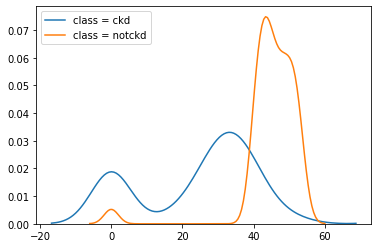

In [37]:
sns.kdeplot(kidney_df[(kidney_df['classification'] == 'ckd')]['pcv'],label='class = ckd')
sns.kdeplot(kidney_df[(kidney_df['classification'] == 'notckd')]['pcv'],label = 'class = notckd')

In [38]:
## Let's do some simple replacement over here
## Based on the above kde plot it is evident that we can replace notckd's with median value of pcv in that range of 40-60
## And replace ckd's with it's group median value
notckd_med_val = int(kidney_df[(kidney_df['classification'] == 'notckd') & (kidney_df['pcv'] != 0)]['pcv'].median())
ckd_med_val = int(kidney_df[(kidney_df['classification'] == 'ckd') & (kidney_df['pcv'] != 0)]['pcv'].median())

kidney_df.loc[(kidney_df['classification'] == 'notckd') & (kidney_df['pcv'] == 0),'pcv'] = notckd_med_val
kidney_df.loc[(kidney_df['classification'] == 'ckd') & (kidney_df['pcv'] == 0),'pcv'] = ckd_med_val

## Imputing null values in wc

In [39]:
max_val = kidney_df['wc'].value_counts().index[0]
print("Max occurence value : ",max_val)
kidney_df['wc'].replace('\t?',max_val,inplace = True)
kidney_df['wc'].replace('\t43',max_val,inplace = True)

Max occurence value :  9800


In [40]:
kidney_df['wc'].replace(np.nan,0,inplace = True)
kidney_df['wc'] = kidney_df['wc'].astype(int)

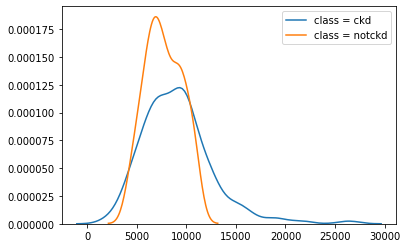

In [41]:
sns.kdeplot(kidney_df[(kidney_df['classification'] == 'ckd') & (kidney_df['wc']!=0)]['wc'],label='class = ckd')
sns.kdeplot(kidney_df[(kidney_df['classification'] == 'notckd') & (kidney_df['wc']!=0)]['wc'],label = 'class = notckd')

In [42]:
 ## Even here we can do groupwise imputation based on categories of classification
 ## Since in certain range of values of wc it is clear that probability density of ckd is more than notckd and vice versa
notckd_med_val = int(kidney_df[(kidney_df['classification'] == 'notckd') & (kidney_df['wc'] != 0)]['wc'].median())
ckd_med_val = int(kidney_df[(kidney_df['classification'] == 'ckd') & (kidney_df['wc'] != 0)]['wc'].median())

In [43]:
kidney_df.loc[(kidney_df['classification'] == 'notckd') & (kidney_df['wc'] == 0),'wc'] = notckd_med_val
kidney_df.loc[(kidney_df['classification'] == 'ckd') & (kidney_df['wc'] == 0),'wc'] = ckd_med_val

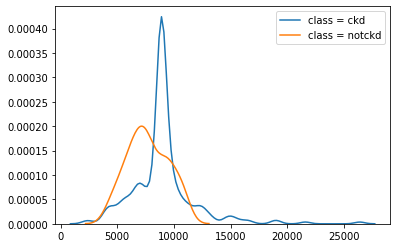

In [44]:
sns.kdeplot(kidney_df[(kidney_df['classification'] == 'ckd') & (kidney_df['wc']!=0)]['wc'],label='class = ckd')
sns.kdeplot(kidney_df[(kidney_df['classification'] == 'notckd') & (kidney_df['wc']!=0)]['wc'],label = 'class = notckd')

Since majority of nan values in 'wc' belong to ckd class.<br>
After imputation there is a peak in pdf for ckd category in wc

In [45]:
## Followed similar process as that of wc & pcv
max_val = kidney_df['rc'].value_counts().index[0]
kidney_df['rc'].replace('\t?',max_val,inplace = True)
kidney_df['rc'].replace('\t43',max_val,inplace = True)
kidney_df['rc'].replace(np.nan,0,inplace = True)
kidney_df['rc'] = kidney_df['rc'].astype(float)
notckd_med_val = float(kidney_df[(kidney_df['classification'] == 'notckd') & (kidney_df['rc'] != 0)]['rc'].median())
ckd_med_val = float(kidney_df[(kidney_df['classification'] == 'ckd') & (kidney_df['rc'] != 0)]['rc'].median())
kidney_df.loc[(kidney_df['classification'] == 'notckd') & (kidney_df['rc'] == 0),'rc'] = notckd_med_val
kidney_df.loc[(kidney_df['classification'] == 'ckd') & (kidney_df['rc'] == 0),'rc'] = ckd_med_val

In [46]:
kidney_df['rc'].unique()

array([5.2, 3.9, 4.6, 4.4, 5. , 4. , 3.7, 3.8, 3.4, 2.6, 2.8, 4.3, 3.2,
       3.6, 4.1, 4.9, 2.5, 4.2, 4.5, 3.1, 4.7, 3.5, 6. , 2.1, 5.6, 2.3,
       2.9, 2.7, 8. , 3.3, 3. , 2.4, 4.8, 5.4, 6.1, 6.2, 6.3, 5.1, 5.8,
       5.5, 5.3, 6.4, 5.7, 5.9, 6.5])

In [47]:
(kidney_df['rc']).dtype

dtype('float64')

In [48]:
cat_cols = kidney_df.columns[kidney_df.isna().any()].tolist()
print("Category columns left to be imputed : ",cat_cols)

Category columns left to be imputed :  ['pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [49]:
## All of this columns are category values and contain a very less number of missing values
## Maximum upto 4 missing values
## So here I'm going to replace them with max occuring category in their column

In [50]:
for col in cat_cols:
  print("Max occuring category in ",col," : ",kidney_df[col].value_counts().index[0],"|| count : ",kidney_df[col].value_counts()[0])

  kidney_df.loc[kidney_df[col].isnull(),col] = kidney_df[col].value_counts().index[0]

Max occuring category in  pcc  :  notpresent || count :  354
Max occuring category in  ba  :  notpresent || count :  374
Max occuring category in  htn  :  no || count :  251
Max occuring category in  dm  :  no || count :  258
Max occuring category in  cad  :  no || count :  362
Max occuring category in  appet  :  good || count :  317
Max occuring category in  pe  :  no || count :  323
Max occuring category in  ane  :  no || count :  339


In [51]:
## Check if any imputation is left or not
kidney_df.isna().any()

id                False
age               False
bp                False
sg                False
al                False
su                False
rbc               False
pc                False
pcc               False
ba                False
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv               False
wc                False
rc                False
htn               False
dm                False
cad               False
appet             False
pe                False
ane               False
classification    False
dtype: bool

Okay, so here we complete our imputation process and have finished the data preprocessing part.<br>
Savind the Preprocessed dataFrame so that it can be later used for EDA and Feature Engineering.

In [52]:
import pickle

In [53]:
sampleFile = open('imputed_df','wb')
pickle.dump(kidney_df,sampleFile)
sampleFile.close()

In [54]:
sampleFile = open("imputed_df","rb")
imputed_df = pickle.load(sampleFile)
sampleFile.close
imputed_df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,0.0,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,1,0.0,notpresent,notpresent,...,38,6000,3.9,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,0,0.0,notpresent,notpresent,...,31,7500,3.9,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,0,1.0,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,0,0.0,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [55]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
